# Data Cleaning and Preprocessing
This notebook handles cleaning tasks for a simulated credit dataset.

In [24]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.getcwd())
print(os.listdir('../Data'))

c:\Users\windows\Desktop\Data Science\Teoria\GITHUB\CreditDataCleaning\Notebooks
['credit_data_simulated.csv']


In [25]:
# Step 2: Load the dataset
dataframe = pd.read_csv('../Data/credit_data_simulated.csv')
dataframe.head()

,id,name,age,gender,salary,state,credit_score,estade
0,1,Ana Silva,34,F,3500.0,SP,700,SP
1,2,Carlos Souza,45,Masc,4200.0,RJ,680,RJ
2,3,Maria Santos,23,NaN,2700.0,MG,720,MG
3,4,João Pereira,52,Masc,5000.0,SP,690,SP
4,5,Paula Costa,29,F,3100.0,RS,710,RS


## Step 3: Treat Categorical Columns
- Rename incorrectly named columns (e.g., "estade" to "state")
- Standardize inconsistent category values (e.g., gender labels like "F", "Fem" to "Feminino")
- Remove missing values (NaN) in categorical columns
- Check unique values to confirm cleaning

In [26]:
## Step 3.1: Rename Incorrect Column
dataframe = dataframe.rename(columns={'estade': 'state'})
dataframe.head()
# Remove duplicate columns
print(dataframe.columns)
dataframe = dataframe.loc[:, ~dataframe.columns.duplicated()]

Index(['id', 'name', 'age', 'gender', 'salary', 'state', 'credit_score',
       'state'],
      dtype='object')


In [27]:
## Step 3.2: Standardize the Gender Column
dataframe['gender'] = dataframe['gender'].replace({
    'F': 'Feminino',
    'f': 'Feminino',
    'Fem': 'Feminino',
    'fem': 'Feminino',
    'Masculino': 'Masculino',
    'Masc': 'Masculino',
    'masc': 'Masculino',
    'm': 'Masculino',
    'M': 'Masculino'
})
# Visualization of Column Values
print(dataframe.groupby('gender').size())

gender
Feminino     4
Masculino    5
dtype: int64


In [28]:
## Step 3.3: Remove Missing Values (NaN) in Categorical Columns
#We replaced the missing values (NaN) in the 'gender' column with the mode, i.e., the most frequent gender value in the dataset, which is "Masculino".
dataframe['gender'].fillna('Masculino', inplace=True)
print(dataframe.groupby('gender').size())

gender
Feminino     4
Masculino    6
dtype: int64


C:\Users\windows\AppData\Local\Temp\ipykernel_22572\4067145842.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['gender'].fillna('Masculino', inplace=True)


# Step 4: Numerical Data Treatment

- Invalid ages were replaced with the median to correct unrealistic values
- Detect and Adjust Outliers in Salary

In [29]:
## Step 4.1: Correct Invalid Ages
# Identify ‘Ages’ outside the domain
dataframe['age'].describe()
dataframe.query('age < 0 or age > 100')

## Step 4.2: Calculate average only with valid ages
meanage = dataframe.query('age >= 0 and age <= 100')['age'].mean()

## Step 4.3: Replace invalid ages with average
dataframe.loc[~dataframe['age'].between(0, 100), 'age'] = meanage
# Check
dataframe.query('age < 0 or age > 100')

C:\Users\windows\AppData\Local\Temp\ipykernel_22572\3688968106.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '36.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[~dataframe['age'].between(0, 100), 'age'] = meanage


,id,name,age,gender,salary,state,credit_score


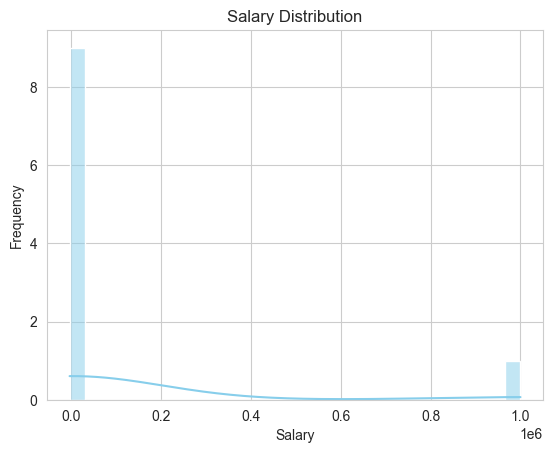

In [ ]:
## Step 4.4: Visualize Salary Distribution
# Show summary descriptive statistics for the 'salary' column.
dataframe['salary'].describe()

# Plots a histogram with KDE to visualize the salary distribution.
sns.set_style('whitegrid')
sns.histplot(dataframe['salary'], bins=30, kde=True, color='skyblue')
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

In [ ]:
## Step 4.5: Analyze Salary Data Quality Check

# Calculate the median salary excluding high outliers  
median_salary = dataframe.loc[dataframe['salary'] < 10000, 'salary'].median()
# Replace negative salaries with the calculated median
dataframe.loc[dataframe['salary'] < 0, 'salary'] = median_salary
# Check
dataframe['salary'].describe()



count        10.000000
mean     104119.900000
std      314787.177531
min        2700.000000
25%        3325.000000
50%        3850.000000
75%        5750.000000
max      999999.000000
Name: salary, dtype: float64

## Step 4.6: Correct Salary Typos
- In this final step, we identify and correct salaries that are unrealistically high, assuming they are data entry errors.
Salaries above 1,000,000 are replaced by the median of the valid salary values.

- If these high salaries are confirmed as real, do not modify them to avoid biasing the analysis.
We also create a flag to mark which values were corrected for future reference.

In [ ]:
# Fix salary value 999999.0 (assumed to be a typo)
# Calculate the median of valid salaries (under 100,000)
mediana = dataframe.loc[dataframe['salary'] < 100000, 'salary'].median()

# Replace the incorrect salary with the median
dataframe.loc[dataframe['salary'] == 999999.0, 'salary'] = mediana

# Create a flag to indicate which record was corrected
dataframe['salary_corrected'] = dataframe['salary'] == mediana

# Add a flag column indicating corrected salary entries
print(dataframe[dataframe['salary_corrected']][['id', 'name', 'salary']])


   id           name  salary
0   1      Ana Silva  4200.0
1   2   Carlos Souza  4200.0
5   6  Luiz Oliveira  4200.0


## Step 4.6: Correct Salary Typo

In this step, we identified a salary value of `999999.0`, which is most likely a data entry mistake (e.g., a misplaced decimal or extra digits).  
To correct this, we replaced it with the median of valid salaries under 100,000.

> ⚠️ **Important:**  
> If this value represents a real salary (e.g., a high-paying executive role), it should **not be modified**, as removing or altering valid high values can introduce bias into the analysis and distort real-world patterns.

We also created a `salary_corrected` flag to indicate which record was modified, allowing traceability and transparency in the data cleaning process.